<a href="https://colab.research.google.com/github/shubham19nijwala/EDA-Hotel_Booking/blob/main/EDA_on_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Hotel Booking Analysis



##### **Project Type**    - *EDA Project*
##### **Contribution**    - *Individual*
##### **Name -** *Shubham Singh Nijwala* 


# **Project Summary -**

This project focuses on analyzing hotel bookings data, which includes two types of hotels: City Hotel and Resort Hotel. The dataset contains 119,390 rows and 32 columns. The workflow of this project is divided into three categories: Data Collection and Understanding, Data Cleaning and Manipulation, and Exploratory Data Analysis (EDA).

In the Data Collection phase, the first step is to identify the different columns in the dataset using methods such as head(), tail(), info(), describe(), and columns(). The names of some of the important columns such as hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights are updated. Then, we identify the unique values of each column and generate a list in a tabular form. We also check the data type of each column and correct any inaccuracies in the Data Cleaning phase. Additionally, duplicate data items are removed, as there were 87,396 duplicate items found and dropped from the dataset.

Before visualizing any data, we have to perform data wrangling. We check for null values in all columns and drop any columns with a significant number of null values using the 'drop' method. For columns with minimal null values, we fill in the missing values with the necessary values using the .fillna() method.

In the EDA phase, we use various charts and graphs to visualize the data and obtain better insights into the dataset's patterns and trends. The objective is to gain insights into business objectives, such as identifying the peak season for bookings, analyzing the average lead time, and evaluating the cancellation rate for different types of hotels. This information can help hotel management to make informed decisions about pricing, marketing, and staffing.

In conclusion, this project's primary focus is on analyzing hotel booking data using different data science techniques. The project follows a structured workflow and utilizes various data manipulation and visualization methods to identify trends and insights that can help improve business decision-making.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.

## **Business Objective** 

Conduct an analysis of the booking data for both the City Hotel and Resort Hotel to acquire insights into the diverse factors that influence the booking process.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
hotel_df=pd.read_csv("/content/drive/MyDrive/EDA-Hotel_Booking(shubham)/Hotel Bookings.csv")

### Dataset First View

In [4]:
# Dataset First Look
hotel_df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
53702,City Hotel,1,116,2016,June,27,27,1,5,1,...,Non Refund,NaN,NaN,15,Transient,140.0,0,0,Canceled,2016-05-06
10421,Resort Hotel,1,312,2017,March,10,5,2,5,2,...,No Deposit,298.0,NaN,0,Transient-Party,30.0,0,0,Canceled,2016-09-15
101099,City Hotel,0,46,2016,November,45,4,0,2,1,...,No Deposit,27.0,NaN,0,Transient,67.5,0,0,Check-Out,2016-11-06
29949,Resort Hotel,0,24,2017,March,13,29,0,2,2,...,No Deposit,250.0,NaN,0,Group,63.0,0,5,Check-Out,2017-03-31
48339,City Hotel,1,79,2016,March,13,21,1,2,2,...,No Deposit,9.0,NaN,0,Transient,96.3,0,0,Canceled,2016-02-14


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
hotel_df.shape

(119390, 32)

### Dataset Information

In [6]:
# Dataset Info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(hotel_df.duplicated().sum())
#Remove Duplicates:
hotel_df.drop_duplicates(inplace=True)


31994


In [8]:
hotel_df.shape

(87396, 32)

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
missing_values=hotel_df.isnull().sum().sort_values(ascending=False)[:5]
missing_values


company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

### What did you know about your dataset?

The dataset available here compares booking information between a city hotel and a resort hotel. It consists of 119390 rows and 32 columns that provide details on the booking date, duration of stay, number of guests, available parking spaces, and more. However, the dataset contains duplicated items (31994) that were later removed. Upon reviewing the dataset, we noticed that some columns have inaccurate data types, which were also removed. Additionally, we examined each column to determine its unique values and understand the actual data stored in it.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df_columns=hotel_df.columns
df_columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# Dataset Describe
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Variables Description

## **Description of individual Variable**
**The columns and the data it represents are listed below:**

**hotel** : Name of the hotel (Resort Hotel or City Hotel)

**is_canceled** : If the booking was canceled (1) or not (0)

**lead_time**: Number of days before the actual arrival of the guests

**arrival_date_year** : Year of arrival date

**arrival_date_month** : Month of month arrival date

**arrival_date_week_number** : Week number of year for arrival date

**arrival_date_day_of_month** : Day of arrival date

**stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

**stays_in_week_nights** : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

**adults** : Number of adults among guests

**children**: Number of children among guests

**babies** : Number of babies among guests

meal : Type of meal booked

**country** : Country of guests

**market_segment** : Designation of market segment

**distribution_channel** : Name of booking distribution channel

**is_repeated_guest** : If the booking was from a repeated guest (1) or not (0)

**previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** : Code of room type reserved

**assigned_room_type** : Code of room type assigned

**booking_changes** : Number of changes/amendments made to the booking

**deposit_type** : Type of the deposit made by the guest

**agent** : ID of travel agent who made the booking

**company** : ID of the company that made the booking

**days_in_waiting_list** : Number of days the booking was in the waiting list

**customer_type** : Type of customer, assuming one of four categories

**adr** : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces** : Number of car parking spaces required by the customer

**total_of_special_requests** : Number of special requests made by the customer

**reservation_status** : Reservation status (Canceled, Check-Out or No-Show)

**reservation_status_date** : Date at which the last reservation status was updated

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
hotel_df.apply(lambda col : col.unique())

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## 3. ***Data Wrangling***

### Data Cleaning

In [13]:
#columns having null_values
missing_values[:4]


company     82137
agent       12193
country       452
children        4
dtype: int64

In [14]:
# It is better to drop the column 'company' because the number of missing values is extremely high.
hotel_df.drop(['company'],axis=1,inplace=True)


In [15]:
# Filling/replacing null values in 'agent' and 'children' columns  with 0.
null_columns=['agent','children']
for col in null_columns:
  hotel_df[col].fillna(0,inplace=True)

In [16]:
hotel_df[['agent','children']].isnull().sum()

agent       0
children    0
dtype: int64

In [17]:
# Filling/replacing null values in 'country' column with 'others'
hotel_df['country'].fillna('others',inplace=True)


In [18]:
hotel_df['country'].isnull().sum()

0

In [19]:
#let's check whether database having any other null values
## As we have seen, no column has any null value
hotel_df.isnull().sum() 
     

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

##**Change in datatype for required columns**

In [20]:
# We have seen that childer & agent column as datatype as float whereas it contains only int value, lets change datatype as 'int64'
hotel_df[['children', 'agent']] = hotel_df[['children', 'agent']].astype('int64')

 ***Adding new columns as per need ***

In [21]:
#total stay in nights
hotel_df['total_stay_in_nights'] = hotel_df ['stays_in_week_nights'] + hotel_df ['stays_in_weekend_nights']
hotel_df['total_stay_in_nights'] 

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_stay_in_nights, Length: 87396, dtype: int64

In [22]:
#creating new column 'revenue':
#revenue generated = total_stay_in_nights  * adr
# where, adr : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights
hotel_df['revenue'] = hotel_df['total_stay_in_nights'] *hotel_df['adr']
hotel_df['revenue']

0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
119385     672.98
119386    1578.01
119387    1103.97
119388     730.80
119389    1360.80
Name: revenue, Length: 87396, dtype: float64

In [23]:
#Hotel wise total revenue:
hotel_df.groupby('hotel')['revenue'].sum()

hotel
City Hotel      18774101.54
Resort Hotel    15686837.77
Name: revenue, dtype: float64

In [24]:
# adding  column  'total_guest' coming for each booking:
hotel_df['total_guest'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']
hotel_df['total_guest'].sum()


176999

In [25]:
# for understanding, from col 'is_canceled': we will replace the value from (0,1) to not_canceled, is canceled.

hotel_df['is_canceled'] = hotel_df['is_canceled'].replace([0,1], ['not canceled', 'is canceled'])
hotel_df['is_canceled']

0         not canceled
1         not canceled
2         not canceled
3         not canceled
4         not canceled
              ...     
119385    not canceled
119386    not canceled
119387    not canceled
119388    not canceled
119389    not canceled
Name: is_canceled, Length: 87396, dtype: object

In [26]:
#Same for 'is_repeated_guest' col
hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].replace([0,1], ['not repeated', 'repeated'])
hotel_df['is_repeated_guest']

0         not repeated
1         not repeated
2         not repeated
3         not repeated
4         not repeated
              ...     
119385    not repeated
119386    not repeated
119387    not repeated
119388    not repeated
119389    not repeated
Name: is_repeated_guest, Length: 87396, dtype: object

### What all manipulations have you done and insights you found?

We have done few manipulations in the Data.

---**Addition of columns**----

We have seen that there are few columns required in Data to analysis purpose which can be evaluated from the given columns.

a) Total Guests: This columns will help us to evaluate the volumes of total guest and revenue as well. We get this value by adding total no. of Adults, Children & babies.

b) Revenue: We find revenue by multiplying adr & total guest. This column will use to analyse the profit and growth of each hotel.

----**Delete of columns**----

a)company: As we have seen that this columns has almost Null data. so we have delete this column as this will not make any impact in the analysis.

----**Replace of Values in columns**----

a)is_canceled, is_not_canceled & is_repeated_guest: We have seen, that these columns contains only 0,1 as values which represent the status of booing cancellation. We replace these values (0,1) from 'Canceled' & 'Not canceled. In the same way for column 'is_repeated_guest', we replace 0,1 from 'Repeated' & 'Not repeated'. Now this values will help to make better understanding while visulization.

----**Changes in data type of values in columns**----

a)Agent & Children: We checked that these columns contains float values, which is not making any sense in data as this values repreasent the count of guest & ID of agent. So we have changed the data type of these columns from 'float' to 'Integer'.

----**Removed is_null values & duplicate entries**----

a)Before visualize any data from the data set we have to do data wrangling. For that, we have checked the null value in all the columns. After checking, when we are getting a column which has more number of null values, dropped that column by using the 'drop' method. In this way, we are dropped the 'company' column. When we are find minimal number of null values, filling thse null values with necesary values as per requirement by using .fillna().

b) In the same, we have checked if there is any duplicacy in data & we found that there are few rows have duplicate data. So we have removed those row from data set by using .drop_duplicates() method.

In this way, we have removed unneccesary data & make our data clean and ready to analyse.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

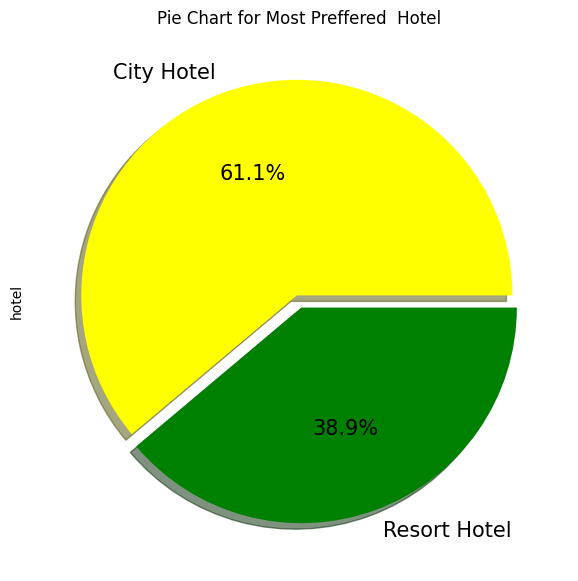

In [84]:
# Chart - 1 visualization code
# Visualizsing the by pie chart.
hotel_df['hotel'].value_counts().plot.pie(explode=[0.03, 0.03], autopct='%1.1f%%', shadow=True, figsize=(9,7),fontsize=15,colors=['yellow','green'])   
plt.title('Pie Chart for Most Preffered  Hotel')

##### 1. Why did you pick the specific chart?

**To demonstrate type of hotel is mostly prefered by the guests.**

##### 2. What is/are the insight(s) found from the chart?

**City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 **The presentation has had a positive impact on the business of both hotels:
The City Hotel has added more services to attract guests and generate higher revenue.
The Resort Hotel has identified ways to attract more guests and is studying the City Hotel's successful strategies for inspiration.**

#### Chart - 2

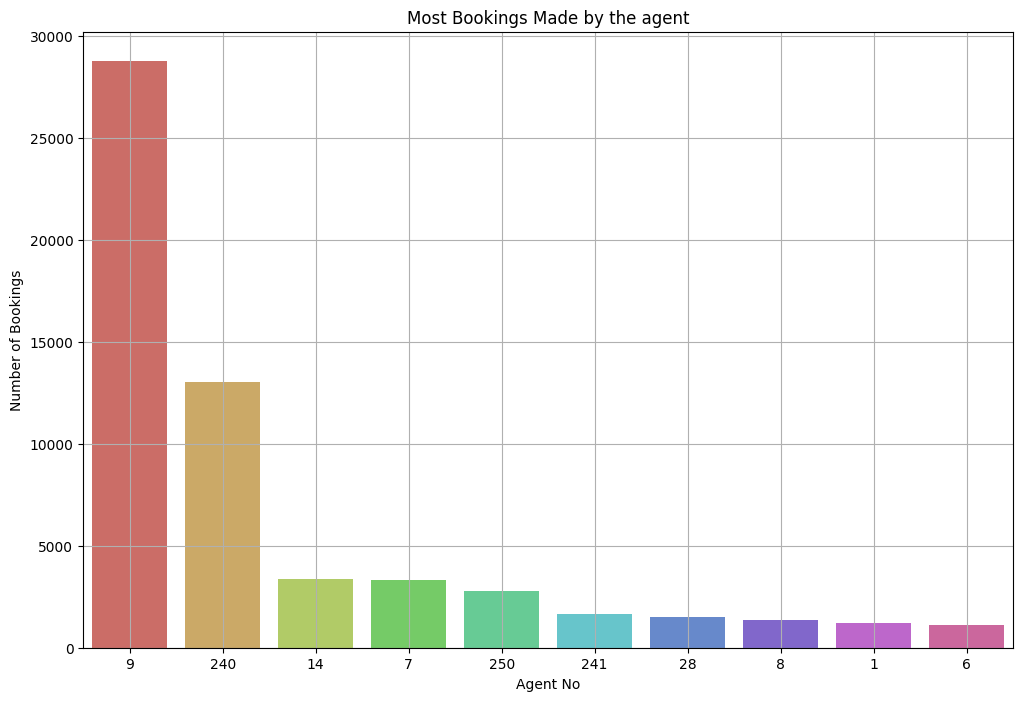

In [93]:
# Chart - 2 visualization code
highest_bookings= hotel_df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True)   #or simply: highest_bookings.drop(0)
# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]
plt.figure(figsize=(12,8))
sns.barplot(x='agent',y='Most_Bookings',order=top_ten_highest_bookings['agent'],data=top_ten_highest_bookings,palette = 'hls')
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")
plt.grid(True)



##### 1. Why did you pick the specific chart?

**From the given chart we found out top 10 Agents responsible for large number of  bookings**

##### 2. What is/are the insight(s) found from the chart?

**Agent ID no: 9 made most of the bookings.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Agent ID no. 9 has higher number of bookings compared to the other agents, it suggests that he may have better sales and customer service skills. By identifying and analyzing his successful practices, the business can develop and implement strategies to train and motivate other agents to improve their performance, ultimately leading to increased bookings and revenue for the business.**

#### Chart - 3

Text(0.5, 1.0, 'Cancellation and non Cancellation')

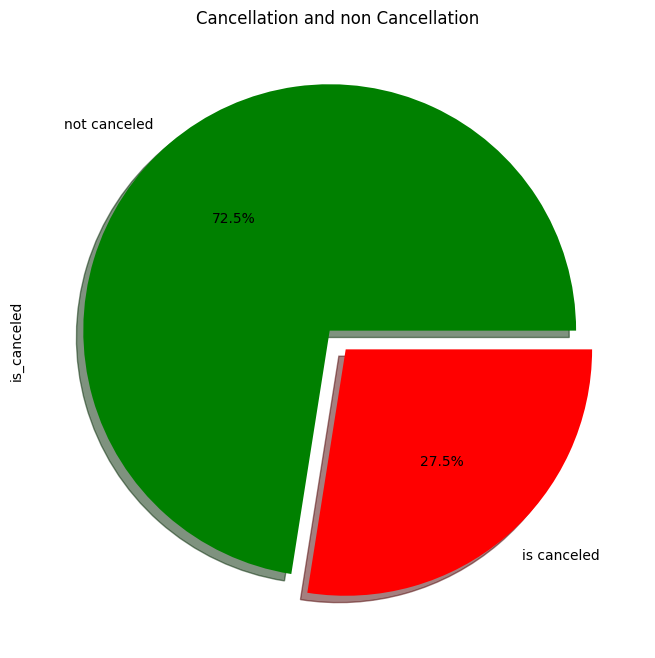

In [92]:
# Chart - 3 visualization code
hotel_df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=10,colors=['green','red'])
plt.title("Cancellation and non Cancellation")

##### 1. Why did you pick the specific chart?

**In this chart, we presented the cancellation rate of the hotels booking**

##### 2. What is/are the insight(s) found from the chart?

**Here, we found that overall about 27% of booking got cancelled**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 **Here, we can see, that about  27% booking getting cancelled.**
>**Way forward: We can identify the reason of cancellation of a booking and come up with certain measures which work in direction of minimizing cancellation rate and help in business growth.**





#### Chart - 4

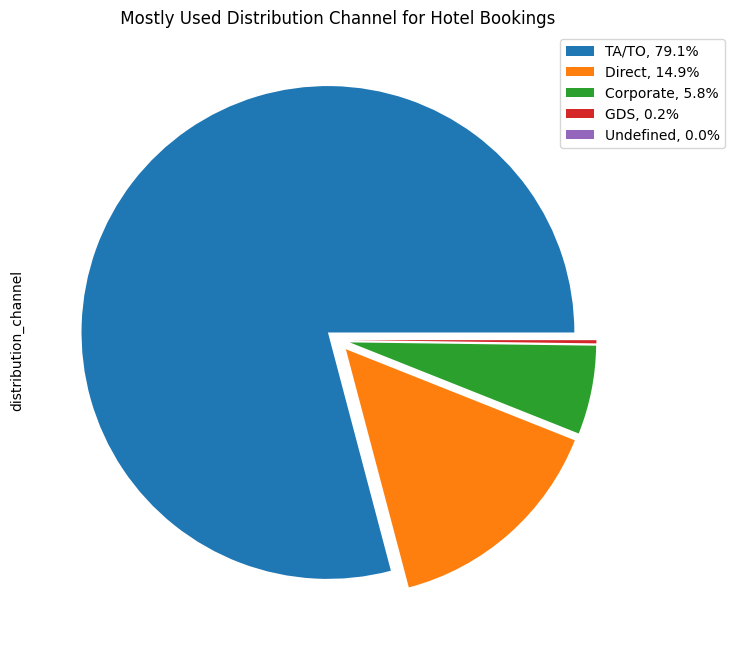

In [30]:
# Chart - 4 visualization code
#Creating labels
labels=hotel_df['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel
distribution_channel_df=hotel_df['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/hotel_df.shape[0],1)

#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the piw chart
hotel_df['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)   

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')
plt.show()


##### 1. Why did you pick the specific chart?

**To calculate the percentage  contribution of booking through different distribution channel.**

##### 2. What is/are the insight(s) found from the chart?

**As clearly seen TA/TO(Tour of Agent & Tour of operator) is highest percentage, recommending to continue booking through TA/TO**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The given chart help us finding loopholes in hotel bookings via distribution channel.Since apart from TA/TO all the other distribution channel doesnot provide good number of bookings which shows inefficiency and required bold intervention to come up with different strategies.**

#### Chart - 5

Text(0.5, 1.0, 'Year Wise bookings')

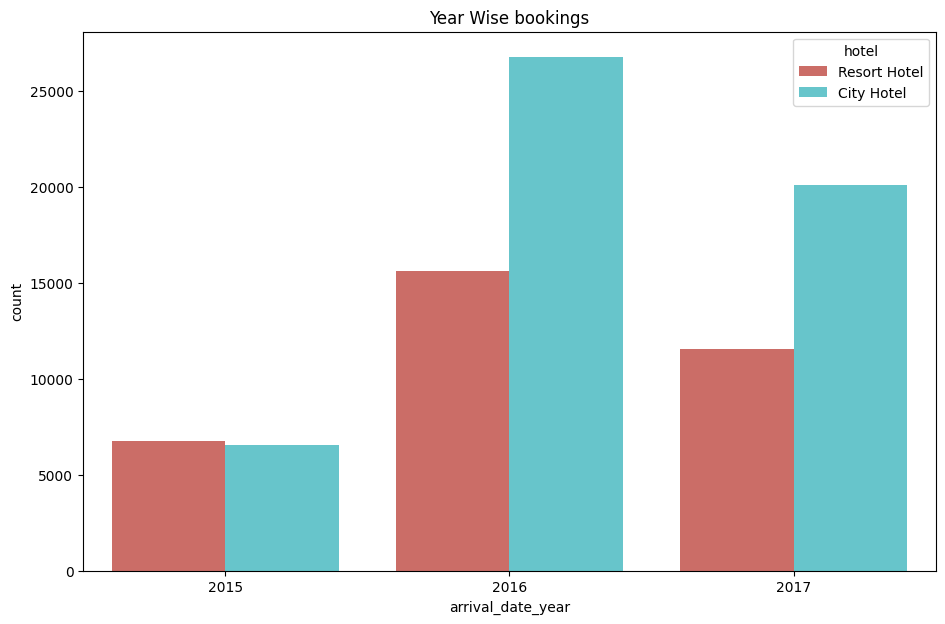

In [88]:
# Chart - 5 visualization code
# set plot size
plt.figure(figsize=(11,7))

#  plot with countplot
sns.countplot(x=hotel_df['arrival_date_year'],hue=hotel_df['hotel'],palette = 'hls')
plt.title("Year Wise bookings")

##### 1. Why did you pick the specific chart?

**To compare year wise bookings of 2 hotels**

##### 2. What is/are the insight(s) found from the chart?

 #**2016 had the higest bookings.**
 #***2015 had less than 7500 bookings***
 #**overall City hotels had the most of the bookings.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, it help in creating positive business impact:**
>**the company should focus on improving and expanding its City hotels since they have the highest number of bookings. Additionally, the company should investigate the reasons behind the decrease in bookings in 2015 and take measures to prevent similar situations in the future. Also analyse the reason behind highest bookings in 2016.So that it can help in taking future decisions for business growth.**

#### Chart - 6

**ADR across different month**

In [32]:
#groupby
bookings_by_months_df=hotel_df.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df


,arrival_date_month,hotel,adr
8,January,City Hotel,85.092612
9,January,Resort Hotel,49.131584
6,February,City Hotel,88.945304
7,February,Resort Hotel,54.081107
15,March,Resort Hotel,57.569213
14,March,City Hotel,94.763375
0,April,City Hotel,117.156250
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,127.851240


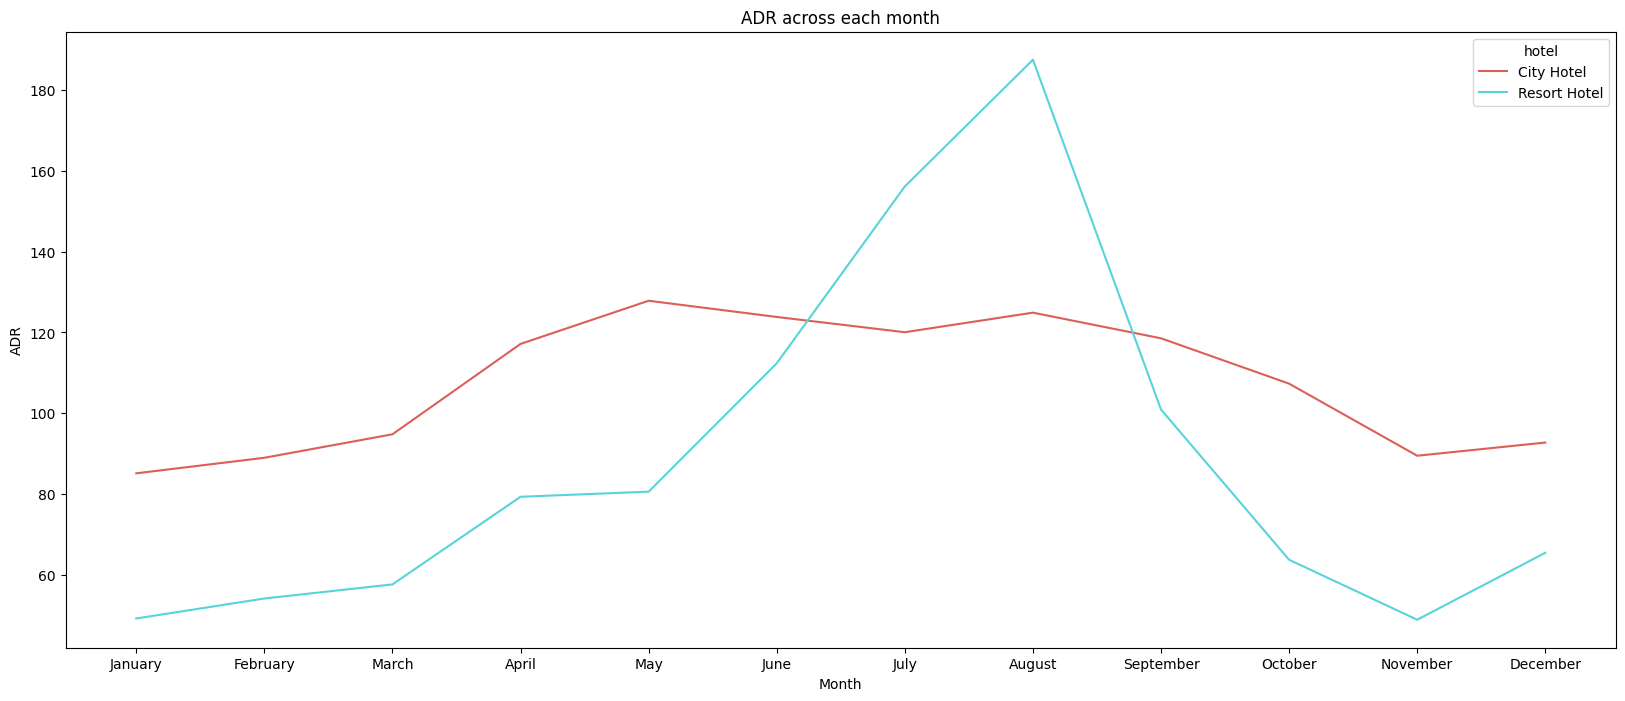

In [96]:
# Chart - 6 visualization code
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'],palette = 'hls')

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.show()

##### 1. Why did you pick the specific chart?

**To analyse trend line for ADR  in different months for both city and resort hotel.**





##### 2. What is/are the insight(s) found from the chart?

**For Resort hotel  ADR is high in the months of June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**It suggests that marketing efforts and promotional activities for resort hotels should be targeted towards the summer season, while city hotels may need to focus on other times of the year to maximize revenue.**

#### Chart - 7

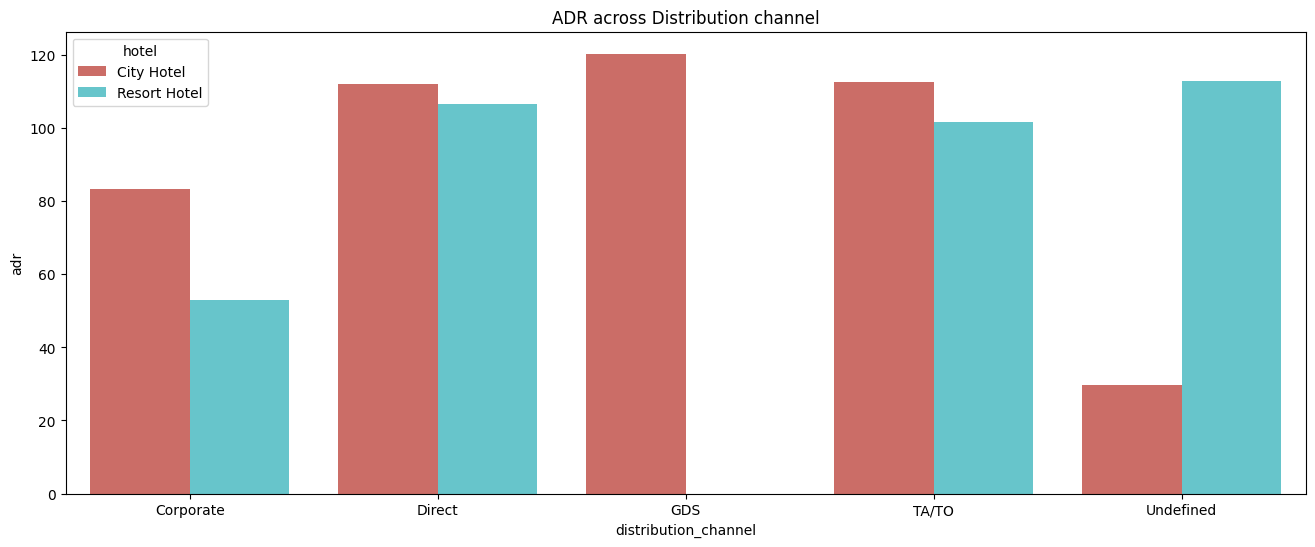

In [90]:
# Chart - 7 visualization code
#7)Which distribution channel contributed more to adr in order to increase the the income.?
# group by distribution channel and hotel
distribution_channel_df=hotel_df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,6))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel',palette = 'hls')
plt.title('ADR across Distribution channel')
plt.show()

* Corporate- These are corporate hotel booing companies which makes bookings 
possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through  travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.


##### 1. Why did you pick the specific chart?

**To compare ADR across distribution channel for both city and resort hotel**

##### 2. What is/are the insight(s) found from the chart?

### From the plot it  is clear that:
###**'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.**
###  **GDS has highly contributed in adr in 'City Hotel' type.But not contribute any adr to 'Resort Hotel.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The analysis shows that direct and TA/TO channels are equally important for ADR in both City and Resort hotels. However, the lack of GDS contribution in Resort hotels could indicate a missed opportunity for revenue generation. Hoteliers in the Resort segment should consider optimizing their GDS strategy to improve ADR and overall revenue performance.**

#### Chart - 8

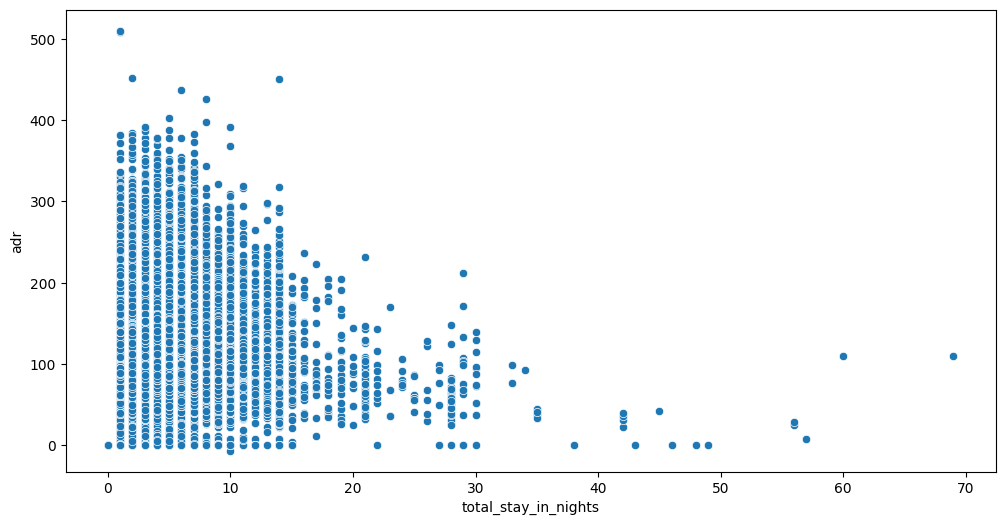

In [35]:
# Chart - 8 visualization code

plt.figure(figsize = (12,6))
sns.scatterplot(x = 'total_stay_in_nights', y = 'adr', data = hotel_df[hotel_df['adr'] < 1000])
plt.show()

##### 1. Why did you pick the specific chart?

**To visualise the distribution of points and finding pattern exisiting between adr and total stay in nights.**

##### 2. What is/are the insight(s) found from the chart?

**From the scatter plot we can see that as length of total_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**The business impact of the relationship between length of total stay and adr suggests that offering discounts or incentives for longer stays may lead to increased customer satisfaction and loyalty. Additionally, this strategy may result in increased revenue and profitability for the business, as longer stays typically lead to higher spending by customers.**

#### Chart - 9

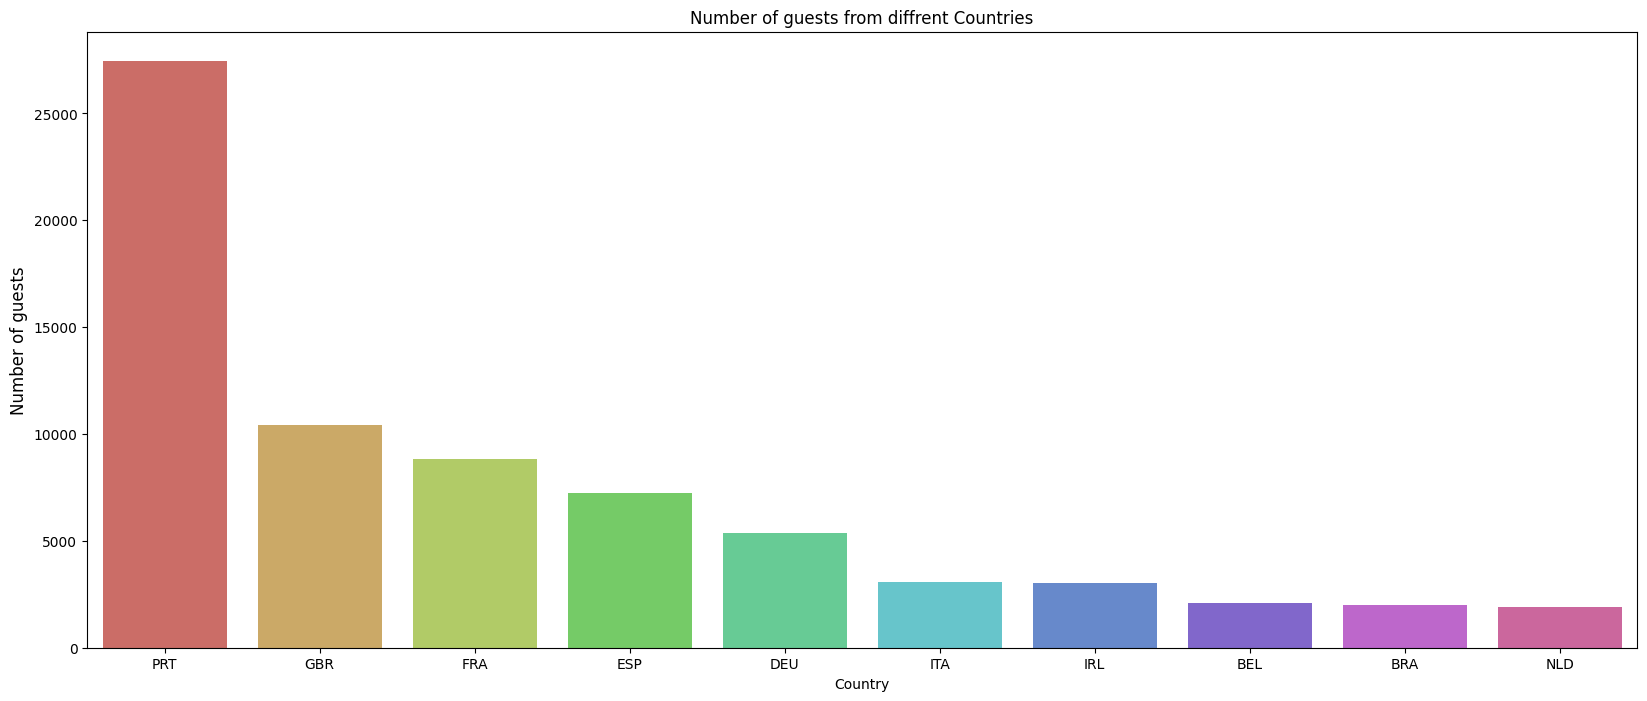

PRT = Portugal 

GBR = Great Britain & Northern Ireland 

FRA = France 

ESP = Spain 

DEU = Germany 

ITA = Italy 

IRL = Ireland 

BEL = Belgium 

BRA = Brazil 

NLD = Netherland


In [94]:
# Chart - 9 visualization code
# Counting the guests from various countries.
country_df=hotel_df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
# country_df1=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'],palette = 'hls')
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")
plt.show()
print('''PRT = Portugal \n
GBR = Great Britain & Northern Ireland \n
FRA = France \n
ESP = Spain \n
DEU = Germany \n
ITA = Italy \n
IRL = Ireland \n
BEL = Belgium \n
BRA = Brazil \n
NLD = Netherland''')

##### 1. Why did you pick the specific chart?

**To Find out: Top 10 countries from where  maximum number of guests are coming.**

##### 2. What is/are the insight(s) found from the chart?

**As we can see, that maximum guest is coming from Portugal.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Knowing that the maximum number of guests are coming from Portugal can have significant business impacts.This information is use  to tailor  services and marketing efforts to better appeal to this demographic, potentially increasing customer satisfaction and revenue. We can also explore opportunities to expand  operations in Portugal or other regions with similar demographics.**

#### Chart - 10

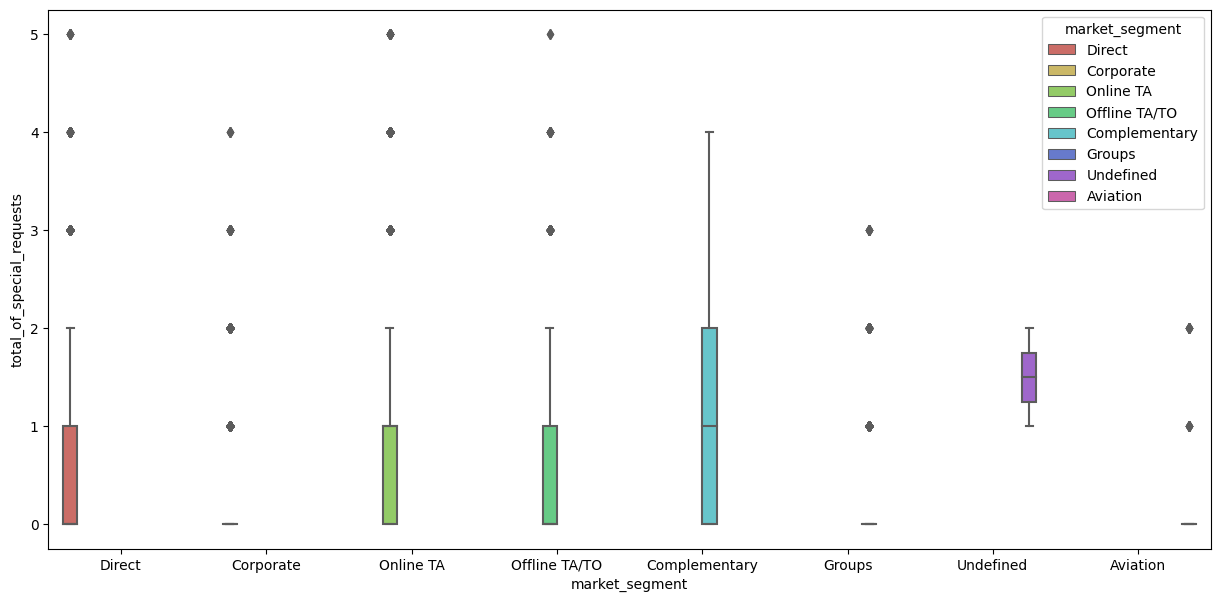

In [97]:
# Chart - 10 visualization code
#Special request acoording to market segment
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= hotel_df,palette = 'hls')

fig = plt.gcf()
fig.set_size_inches(15,7)

##### 1. Why did you pick the specific chart?

**To find out which market segment used mostly by customers with special requests**

##### 2. What is/are the insight(s) found from the chart?

**Almost every market segment having fair amount of requests from customers**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**To mark down the type of requests made by customers and work down in direction of customer satisfaction by  change the business strategy accordingly which help in positive business growth**

#### Chart - 11

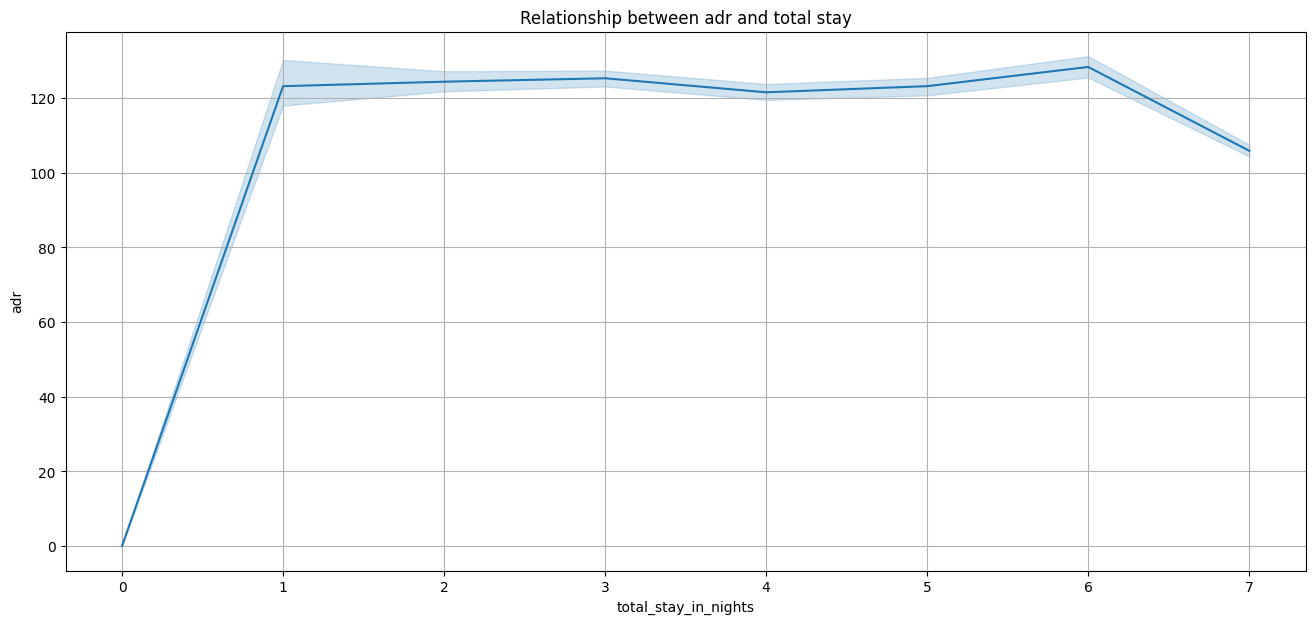

In [99]:
# Chart - 11 visualization code
adr_vs_stay = hotel_df.groupby(['total_stay_in_nights', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay
plt.figure(figsize=(16,7))
sns.lineplot(x='total_stay_in_nights',y='adr',data=adr_vs_stay)
plt.grid(True)
plt.title('Relationship between adr and total stay')
plt.show()

##### 1. Why did you pick the specific chart?

**To visualize the graphical representation of Relationship between adr and total stay**

##### 2. What is/are the insight(s) found from the chart?

**In the begining the graph showing upward trend,i.e, adr increases with increase in total stay,then after it become more or less constant and at the end the curve  slightly drop down which shows adr decreases when total stay increases further.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

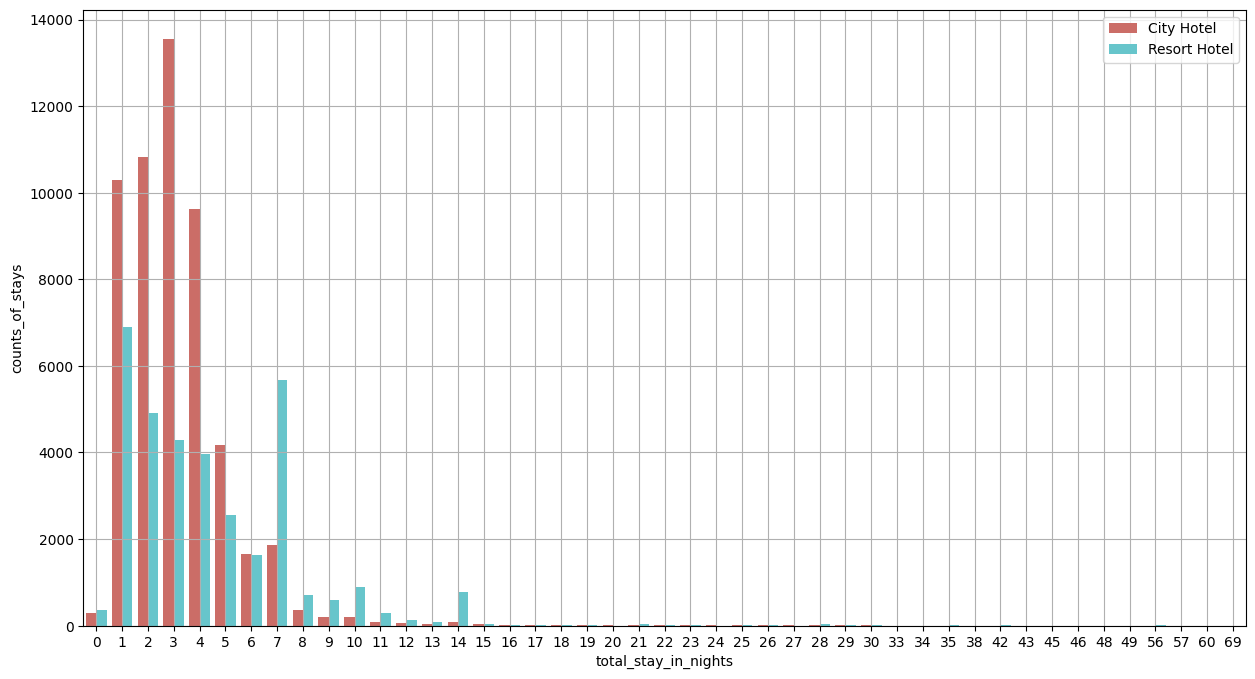

In [95]:
# Chart - 12 visualization code
df=hotel_df.groupby(['total_stay_in_nights','hotel']).agg({'total_stay_in_nights':'count'}).rename(columns={'total_stay_in_nights':'counts_of_stays'}).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='total_stay_in_nights',y='counts_of_stays',data=df,hue='hotel',palette = 'hls')
plt.legend(loc=1)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

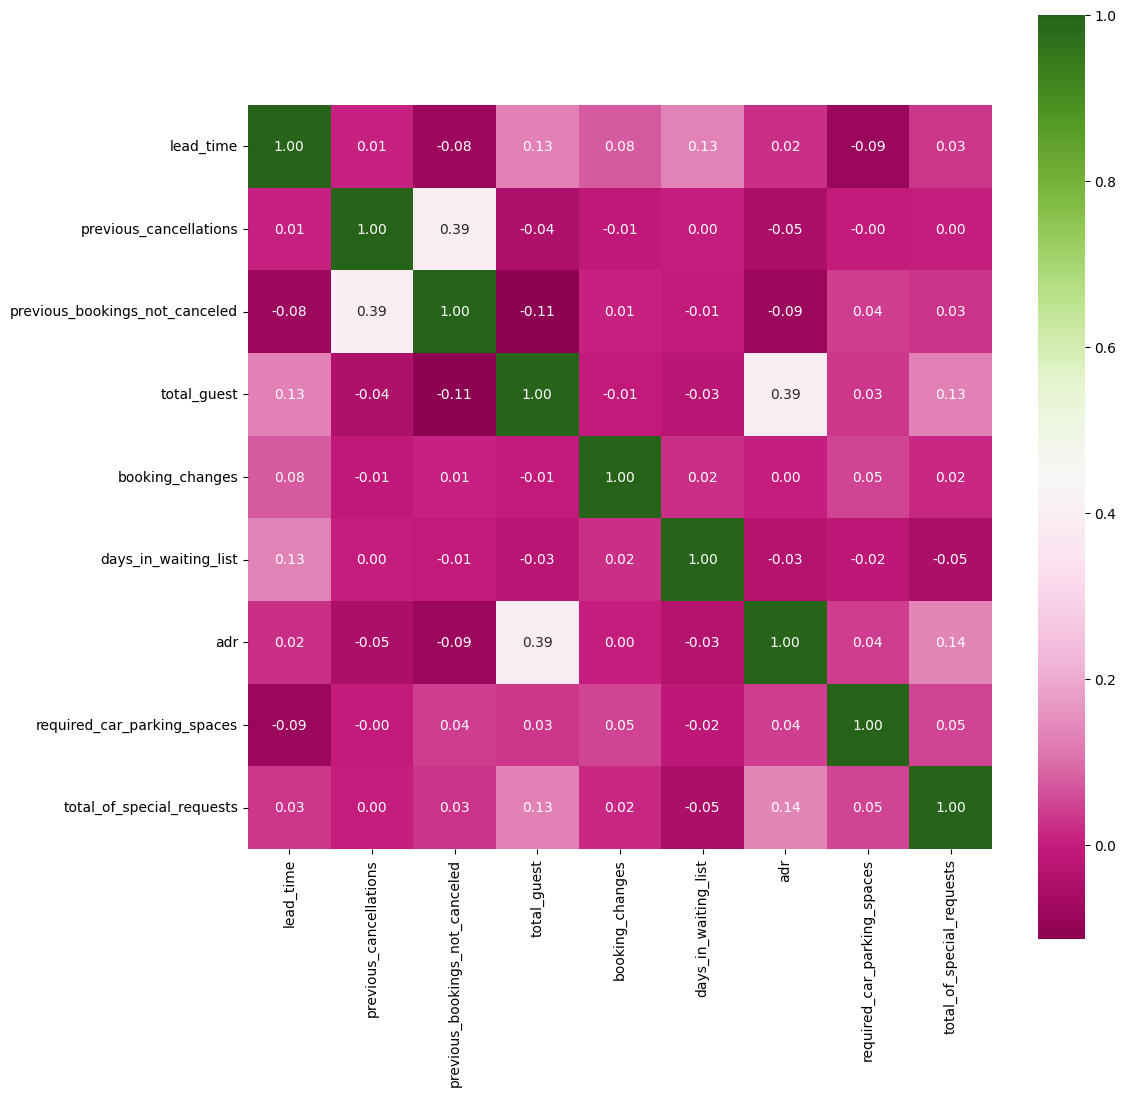

In [80]:
# Correlation Heatmap visualization code

corr_df = hotel_df[['lead_time','previous_cancellations', 'previous_bookings_not_canceled', 'total_guest',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']].corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_df, annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True,cmap="PiYG")
plt.show()

##### 1. Why did you pick the specific chart?

**The given map demonstrate pairwise correlation between numerical columns.Also, along with the magnitude it  gives us direction of variation between pairs which is helpful in finding the type of relation exist between the columns.**

##### 2. What is/are the insight(s) found from the chart?

**higher correlation exists between:**

1. ***(previous_cancellations,previous_bookings_not_canceled) = 39%***
2. ***(total_guest,adr) = 39%***

**lowest correlation exists between:**
1. ***(previous_bookings_not_canceled,total_guest) = -11%*** 



#### Chart - 15 - Pair Plot 

<Figure size 1600x800 with 0 Axes>

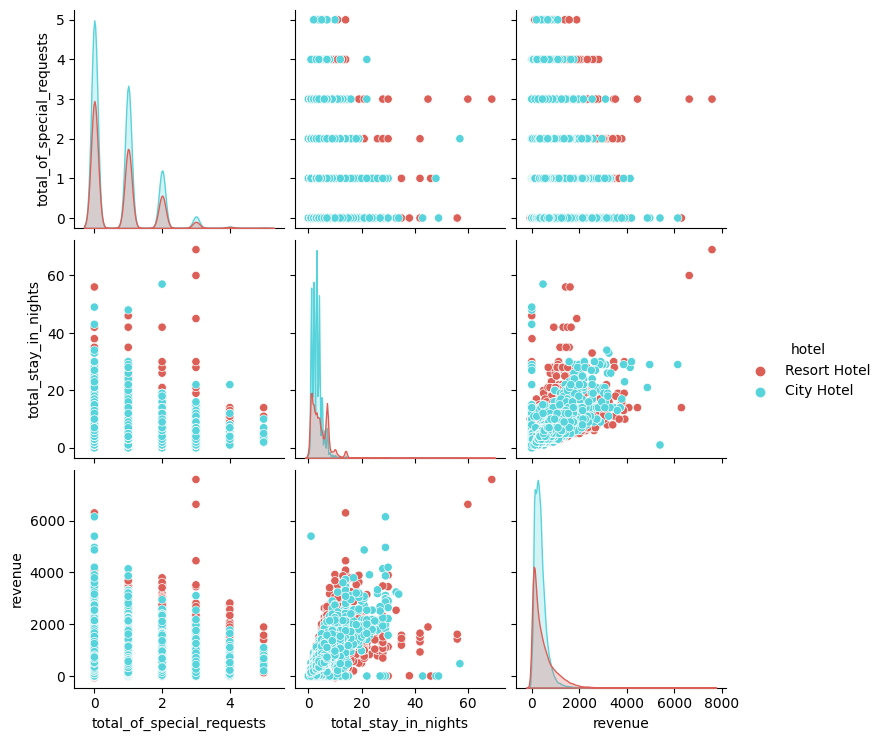

In [100]:
df1=hotel_df[['hotel','total_of_special_requests', 'total_stay_in_nights','revenue']]
plt.figure(figsize=(16,8))
sns.pairplot(df1,hue='hotel',palette = 'hls')
plt.show()

##### 1. Why did you pick the specific chart?

**The given plot is helpful for  giving insights regarding pairwise relation for all numerical columns .**

##### 2. What is/are the insight(s) found from the chart?

1. **Here we can see as number of total special request increases total stay in nights and  revenue decreases except for some outliers**.
2.  **most of the revenue generated when total stay in nights is less than 40.**



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***